Source: https://subscription.packtpub.com/book/data/9781800560475/3/ch03lvl1sec15/segmentation
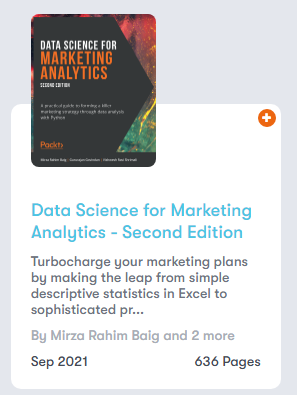

<h1 style="background-color:orange;">
Chaper 3</h1>

<h2 style="background-color:powderblue;">
Exercise 3.01: Mall Customer Segmentation – Understanding the Data</h2>

In [1]:
# source: https://packt.link/Dgl1z
import os as os 
import pandas as pd
os.chdir(r'C:\Users\Fam\Desktop\Dedda\New key\Rstuff\Packt\2. DataScienceforMarketing\3.Ch3')
data0  = pd.read_excel('data.xlsx')#, index_col=0)  
data0.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [2]:
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [3]:
data0.rename({'Annual Income (k$)':'Income', 'Spending Score (1-100)':'Spend_score'}, axis=1, \
             inplace=True)
data0.head()

,CustomerID,Gender,Age,Income,Spend_score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


<h2 style="background-color:powderblue;">
Exercise 3.02: Traditional Segmentation of Mall Customers</h2>

In this exercise, you will perform your first customer segmentation using the income of the customer, employing a traditional rule-based approach to define customer segments. You will plot the distribution for the Income variable and assign groups to customers based on where you see the values lying:

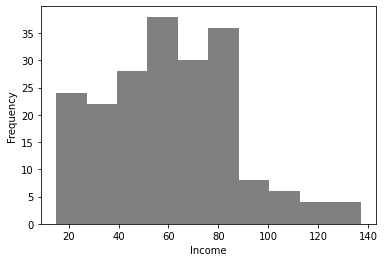

In [4]:
# Plot a histogram of the Income column using the DataFrame's plot method using the following code:
data0.Income.plot.hist(color='gray')
plt.xlabel('Income')
plt.show()

In [5]:
# Create a new column, Cluster, to have the Low Income, Moderate Income, and High earners values 
# for customers with incomes in the ranges < 50, 50–90, and >= 90 respectively
import numpy as np
data0['Cluster'] = np.where(data0.Income >= 90, 'High earners', \
                   np.where(data0.Income < 50, 'Low Income', 'Moderate Income'))
                            
# Check no cust in each cluster & confirm whether values for the Income column in the clusters
data0.groupby('Cluster')['Income'].describe()   

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
High earners,22.0,108.181818,13.661334,93.0,98.25,103.0,118.25,137.0
Low Income,72.0,33.027778,11.091136,15.0,22.50,33.5,43.00,49.0
Moderate Income,106.0,69.377358,10.651584,50.0,61.00,70.0,78.00,88.0


<h2 style="background-color:powderblue;">
Exercise 3.03: Standardizing Customer Data</h2>

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_to_scale = ['Age', 'Income', 'Spend_score']
data_scaled = data0.copy()
data_scaled[cols_to_scale] = scaler.fit_transform(data0[cols_to_scale])

#To verify that this worked, print a descriptive summary of these modified columns:
data_scaled[cols_to_scale].describe()

,Age,Income,Spend_score
count,2.000000e+02,2.000000e+02,2.000000e+02
mean,-9.603429e-17,-6.128431e-16,-1.121325e-16
std,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.496335e+00,-1.738999e+00,-1.910021e+00
25%,-7.248436e-01,-7.275093e-01,-5.997931e-01
50%,-2.045351e-01,3.587926e-02,-7.764312e-03
75%,7.284319e-01,6.656748e-01,8.851316e-01
max,2.235532e+00,2.917671e+00,1.894492e+00


<h2 style="background-color:powderblue;">
Exercise 3.04: Calculating the Distance between Customers</h2>

In this exercise, you will calculate the Euclidean distance between three customers. The goal of the exercise is to be able to calculate the similarity between customers. A similarity calculation is a key step in customer segmentation. After standardizing the Income and Spend_score fields for the first three customers as in the following table (Figure 3.14), you will calculate the distance using the cdist method from scipy.

In [7]:
sel_cols = ['Income', 'Spend_score']
cust3 = data_scaled[sel_cols].head(3)
cust3

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


In [8]:
from scipy.spatial.distance import cdist

# Use cdist calculate distance between each pair of the two collections of inputs. 
cdist(cust3, cust3, metric='euclidean')

array([[0.        , 1.63050555, 1.28167999],
       [1.63050555, 0.        , 2.91186723],
       [1.28167999, 2.91186723, 0.        ]])

In [9]:
# Output shows 
# Distance between 1st & 2nd cust = 1.63 units
# Distance between 1st & 3rd cust = 1.28 units
# Distance between 2nd & 3rd cust = 2.92 units.

# Verify that 1.6305 is indeed the Euclidean distance between cust 1 & 2:
np.sqrt((-1.739+1.739)**2 + (-0.4348-1.1957)**2)

1.6305

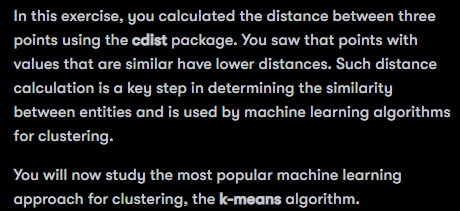

<h2 style="background-color:powderblue;">
Exercise 3.05: K-Means Clustering on Mall Customers</h2>
    
Perform k-means clustering on the mall customer data that was standardized in the previous exercise. You will use only the Income and Spend_score columns.

In [10]:
cluster_cols = ['Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

,Income,Spend_score
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913


In [11]:
data_scaled.head(2)

,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,Low Income
1,2,Male,-1.281035,-1.738999,1.195704,Low Income


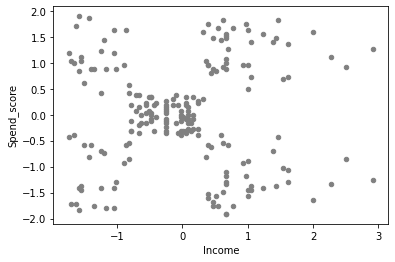

In [12]:
# Visualize data with Income and Spend_score on the x and y axes respectively
data_scaled.plot.scatter(x='Income', y='Spend_score', color='gray')
plt.show()

# From the plot, there are 5 natural clusters in the data. 
# This tells us that we need to specify 5 as the number of clusters for the k-means algorithm.

In [13]:
# Import KMeans from sklearn.cluster. 
# Create an instance of the KMeans model specifying 5 clusters (n_clusters) and 42 for random_state:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=5, random_state=42)

The model instance is created.<br> 
__Note that no clustering has been performed on the data yet.__<br>
n_clusters specifies the number of clusters to create as 5.<br>
Next, fit the model on the data using the columns in cluster_cols for the purpose. Using the predict method of the k-means model, assign the cluster for each customer to the 'Cluster' variable. Print the first three records of the data_scaled dataset:

In [14]:
model.fit(data_scaled[cluster_cols])
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])
data_scaled.head(3)

C:\Users\Fam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Income,Spend_score,Cluster
0,1,Male,-1.424569,-1.738999,-0.434801,2
1,2,Male,-1.281035,-1.738999,1.195704,3
2,3,Female,-1.352802,-1.700830,-1.715913,2


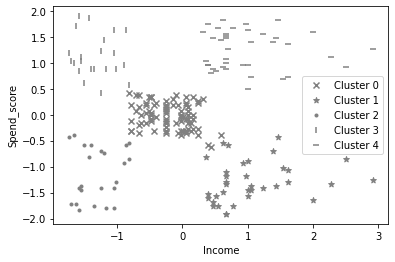

In [15]:
# Now you need to visualize it to see the points assigned to each cluster. 
# Plot each cluster with a marker using the following code. You will subset the dataset for each cluster and use a dictionary to specify the marker for the cluster:
markers = ['x', '*', '.', '|', '_']
for clust in range(5):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.Income, temp.Spend_score, \
                marker=markers[clust], \
                color = 'gray',\
                label="Cluster "+str(clust))
plt.xlabel('Income')
plt.ylabel('Spend_score')
plt.legend()
plt.show()

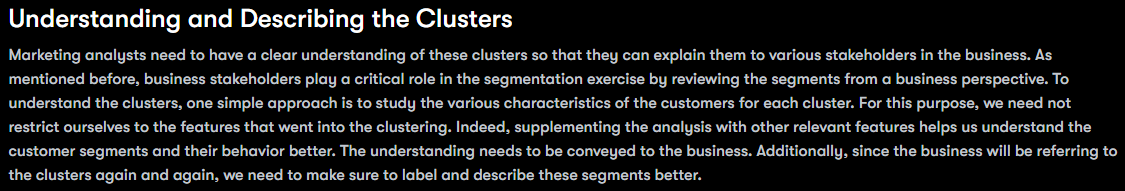

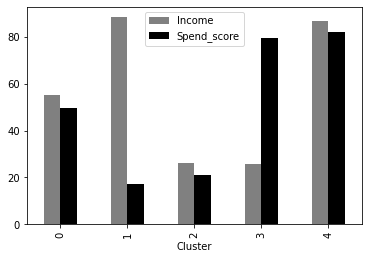

In [16]:
#To understand the characteristics of the clusters better, we will analyze the features in the 
# original scale and not the standardized features. To do so, let's first add the cluster info
# to the data0 dataset that we prepared in Exercise 3.01. Recall that this is the dataset without
# the standardization applied and therefore Income and Spend_Score are available on their original
# scales. Then, let's see how the values of Income and Spend_score vary across the clusters.
# We will group the dataset by Cluster and calculate and plot the mean value of these variables

data0['Cluster'] = data_scaled.Cluster
data0.groupby('Cluster')[['Income', 'Spend_score']].mean()\
     .plot.bar(color=['gray','black'])
plt.show()

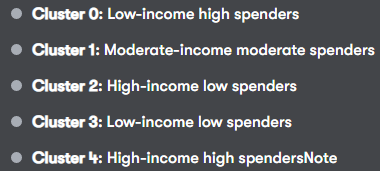

<h2 style="background-color:powderblue;">
Activity 3.01: Bank Customer Segmentation for Loan Campaign</h2>

The task at hand is to create customer segments to maximize the effectiveness of their personal loan campaign.

In [17]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [18]:
# source: https://packt.link/Dgl1z
import os as os 
import pandas as pd
os.chdir(r'C:\Users\Fam\Desktop\Dedda\New key\Rstuff\Packt\2. DataScienceforMarketing\3.Ch3')
bank0   = pd.read_excel('data2.xlsx')#, index_col=0)  
bank0 .head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [19]:
scaler = StandardScaler()
bank0[['Income_scaled', 'CCAvg_scaled']] = scaler.fit_transform(bank0[['Income','CCAvg']])
bank0[['Income_scaled', 'CCAvg_scaled']].describe()

,Income_scaled,CCAvg_scaled
count,5.000000e+03,5.000000e+03
mean,1.939449e-16,-2.078338e-17
std,1.000100e+00,1.000100e+00
min,-1.428969e+00,-1.108987e+00
25%,-7.554825e-01,-7.084116e-01
50%,-2.123482e-01,-2.506106e-01
75%,5.263146e-01,3.216407e-01
max,3.263712e+00,4.613525e+00


In [20]:
model = KMeans(n_clusters=3, random_state=42)
cluster_cols = ['Income_scaled', 'CCAvg_scaled']
model.fit(bank0[cluster_cols])
bank0['Cluster'] = model.predict(bank0[cluster_cols])

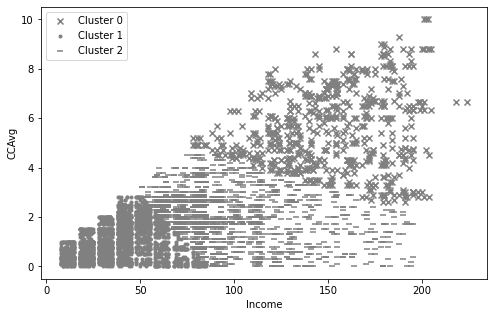

In [21]:
markers = ['x', '.', '_']
plt.figure(figsize=[8,5])
for clust in range(3):
    temp = bank0[bank0.Cluster == clust]
    plt.scatter(temp.Income, temp.CCAvg, \
                marker=markers[clust], \
                color='gray',\
                label="Cluster "+str(clust) )

plt.xlabel('Income')
plt.ylabel('CCAvg')
plt.legend()
plt.show()

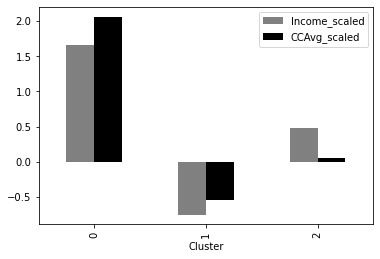

In [22]:
bank0.groupby('Cluster')[['Income', 'CCAvg']].mean()
bank0.groupby('Cluster')[['Income_scaled', 'CCAvg_scaled']]\
                        .mean().plot\
                        .bar(color=['gray','black'])
plt.show()

In [23]:
pd.set_option('display.max_columns', None)
sel_cols = ['Income', 'CCAvg', 'Age', 'Mortgage', 'Family', \
            'CreditCard', 'Online', 'Personal Loan']
bank0.groupby('Cluster')[sel_cols].mean()
#bank0.groupby('Cluster')[sel_cols].describe()

,Income,CCAvg,Age,Mortgage,Family,CreditCard,Online,Personal Loan
Cluster,,,,,,,,
0,150.390282,5.540345,43.924765,89.537618,2.017241,0.285266,0.605016,0.413793
1,39.135072,0.982417,45.797197,42.231218,2.513429,0.294667,0.592448,0.000000
2,96.142777,2.025165,45.184049,65.185165,2.363636,0.296152,0.600112,0.120468


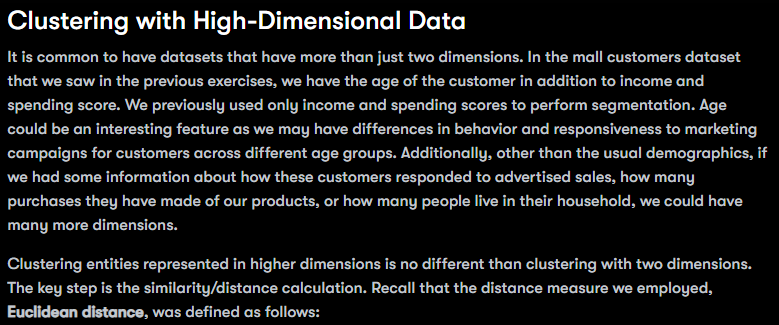
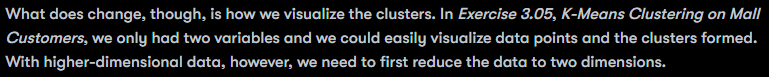

<h2 style="background-color:powderblue;">
Exercise 3.06: Dealing with High-Dimensional Data</h2>

In this exercise, you will perform clustering on the mall customers dataset using the age, income, and spend score. The goal is to find natural clusters in the data based on these three criteria and analyze the customer segments to identify their differentiating characteristics, providing the business with some valuable insight into the nature of its customers. This time though, visualization will not be easy. You will need to use PCA to reduce the data to two dimensions to visualize the clusters:

In [33]:
data_scaled.head(2)

,CustomerID,Gender,Age,Income,Spend_score,Cluster,pc1,pc2
0,1,Male,-1.424569,-1.738999,-0.434801,2,-0.615720,-1.763481
1,2,Male,-1.281035,-1.738999,1.195704,2,-1.665793,-1.820747


In [24]:
cluster_cols = ['Age', 'Income', 'Spend_score']
data_scaled[cluster_cols].head(3)

,Age,Income,Spend_score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913


In [25]:
# Perform k-means clustering, specifying 4 clusters using the scaled features. 
# Specify random_state as 42. Assign the clusters to the Cluster column:
model = KMeans(n_clusters=4, random_state=42)
model.fit(data_scaled[cluster_cols])
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])

C:\Users\Fam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [26]:
# Usi PCA on scaled col, create two new columns, pc1/pc2, containing data for PC1/PC2 respectively:
from sklearn import decomposition
pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(data_scaled[cluster_cols])
data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

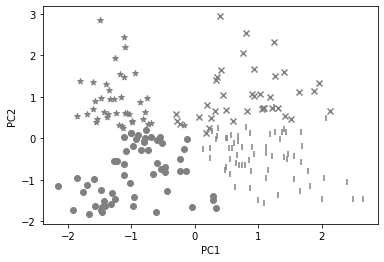

In [27]:
# Visualize clusters by using different markers/colors for clusters for pc1/pc2:
markers = ['x', '*', 'o','|']
for clust in range(4):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], \
                label="Cluster "+str(clust), \
                color='gray')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

In [28]:
# Review clusters 
data0['Cluster'] = data_scaled.Cluster
data0.groupby('Cluster')[['Age', 'Income', 'Spend_score']].mean()

,Age,Income,Spend_score
Cluster,,,
0,39.368421,86.500000,19.578947
1,32.875000,86.100000,81.525000
2,25.438596,40.000000,60.298246
3,53.984615,47.707692,39.969231


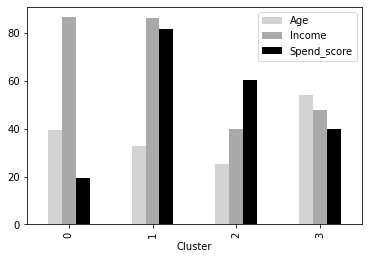

In [30]:
# From the preceding table, you see significant variations between the clusters. 
# Now, check which features are the most differentiated for the clusters using the following code:
data0.groupby('Cluster')[['Age', 'Income', \
                          'Spend_score']].mean() \
     .plot.bar(color=['lightgray', 'darkgray', 'black'])
plt.show()

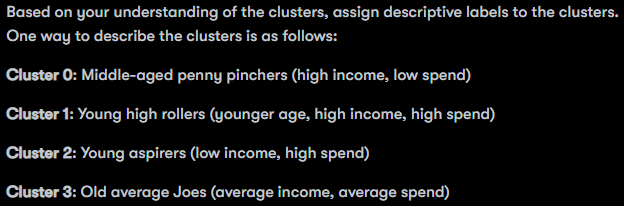

<h1 style="background-color:LightCoral;">
Lets try clustering on the automobile dataset</h1>

__Uses a combination of__ 
- Exercise 3.05: K-Means Clustering on Mall Customers <br>
- Exercise 3.06: Dealing with High-Dimensional Data <br>

My thinking now, is i use ONLY the TARGET data with K-means. If i can find some dominant clusters there then, i can look for similar profile of customers in the NON-Target data.

In [165]:
os.chdir('C:\\Users\\Fam\\Desktop\\Dedda\\New key\\Rstuff\\4. Oct21_DataScientist')
df = pd.read_csv('Automobile_data.csv')
df.head(5)

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,four,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,six,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,four,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,five,115,18,17450.0


In [166]:
df.isna().sum()

index               0
company             0
body-style          1
wheel-base          0
length              0
engine-type         0
num-of-cylinders    0
horsepower          0
average-mileage     0
price               3
dtype: int64

In [167]:
df.dtypes

index                 int64
company              object
body-style           object
wheel-base           object
length              float64
engine-type          object
num-of-cylinders     object
horsepower            int64
average-mileage       int64
price               float64
dtype: object

In [168]:
# Fix DF
df = df.drop(df[df['wheel-base'] == 'na'].index)
df['price'].fillna(df['price'].mode()[0], inplace=True)
df['wheel-base'] = df['wheel-base'].astype(float)

In [169]:
# Check df fixed
num = df[['num-of-cylinders']]
wb  = df[['wheel-base']]
#num.groupby('num-of-cylinders').count()

def describe_object(df, col_name):
    print(f"\nCOLUMN: {col_name}")
    print(f"{df[col_name].nunique()} different values")
    print(f"List of values:")
    print(df[col_name].value_counts\
                      (dropna=False, normalize=True))
    
#describe_object(num, 'num-of-cylinders')
describe_object(wb, 'wheel-base')


COLUMN: wheel-base
27 different values
List of values:
94.5     0.150000
95.7     0.100000
97.3     0.066667
93.7     0.066667
93.1     0.050000
110.0    0.050000
96.5     0.050000
88.6     0.033333
113.0    0.033333
89.5     0.033333
96.3     0.033333
104.3    0.033333
103.5    0.033333
101.2    0.033333
99.8     0.033333
94.3     0.016667
88.4     0.016667
95.3     0.016667
104.9    0.016667
120.9    0.016667
112.0    0.016667
100.4    0.016667
105.8    0.016667
98.4     0.016667
99.4     0.016667
104.5    0.016667
102.0    0.016667
Name: wheel-base, dtype: float64


In [170]:
# Replace string with int
num_map = {'?':1, 'two':2, 'three':3, 'four':4, 'five':5, 'six':6, 'eight':8, 'twelve':12}
df['num-of-cylinders'] = df['num-of-cylinders'].map(num_map)
df.head()

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,88.6,168.8,dohc,4,111,21,13495.0
1,1,alfa-romero,convertible,88.6,168.8,dohc,4,111,21,16500.0
2,2,alfa-romero,hatchback,94.5,171.2,ohcv,6,154,19,16500.0
3,3,audi,sedan,99.8,176.6,ohc,4,102,24,13950.0
4,4,audi,sedan,99.4,176.6,ohc,5,115,18,17450.0


In [184]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
scaler = StandardScaler()

data0 = df.copy()
data_scaled = df.copy()

data_scaled[['horsepower', 'price','num-of-cylinders', 'wheel-base', 'length','average-mileage']] =\
scaler.fit_transform(data_scaled[['horsepower', 'price','num-of-cylinders','wheel-base', 'length'\
                                  ,'average-mileage']])
data_scaled.head(2)

,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price
0,0,alfa-romero,convertible,-1.474794,-0.302326,dohc,-0.41719,0.05668,-0.597171,-0.174914
1,1,alfa-romero,convertible,-1.474794,-0.302326,dohc,-0.41719,0.05668,-0.597171,0.097388


In [185]:
#cluster_cols = ['horsepower', 'price','num-of-cylinders'] # Experiment 1
cluster_cols = ['length', 'wheel-base'] # Experiment 2
cluster_cols = ['length', 'wheel-base','average-mileage'] # Experiment 3
data_scaled[cluster_cols].head(3)

,length,wheel-base,average-mileage
0,-0.302326,-1.474794,-0.597171
1,-0.302326,-1.474794,-0.597171
2,-0.131063,-0.590218,-0.843427


In [223]:
# Change n clusters to match the no of col 
model = KMeans(n_clusters=5, random_state=42)
model.fit(data_scaled[cluster_cols])
data_scaled['Cluster'] = model.predict(data_scaled[cluster_cols])
data_scaled.head(3)

C:\Users\Fam\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,index,company,body-style,wheel-base,length,engine-type,num-of-cylinders,horsepower,average-mileage,price,Cluster,pc1,pc2
0,0,alfa-romero,convertible,-1.474794,-0.302326,dohc,-0.417190,0.056680,-0.597171,-0.174914,4,-0.702386,1.421508
1,1,alfa-romero,convertible,-1.474794,-0.302326,dohc,-0.417190,0.056680,-0.597171,0.097388,4,-0.702386,1.421508
2,2,alfa-romero,hatchback,-0.590218,-0.131063,ohcv,0.866471,0.860163,-0.843427,0.097388,4,0.038712,1.033496


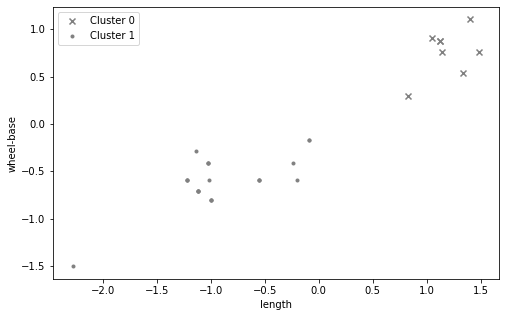

In [227]:
# This is for two features
markers = ['x', '.']
plt.figure(figsize=[8,5])
for clust in range(2):
    temp = data_scaled[data_scaled.Cluster == clust]
    plt.scatter(temp['length'], temp['wheel-base'], \
                marker=markers[clust], \
                color='gray',\
                label="Cluster "+str(clust) )
plt.xlabel('length') #'price'
plt.ylabel('wheel-base') # 'horsepower'
plt.legend()
plt.show()

# This is for 3 or more features
# Usi PCA on scaled col, create two new columns, pc1/pc2, containing data for PC1/PC2 respectively:
# from sklearn import decomposition
# pca = decomposition.PCA(n_components=3)
# pca_res = pca.fit_transform(data_scaled[cluster_cols])
# data_scaled['pc1'] = pca_res[:,0]
# data_scaled['pc2'] = pca_res[:,1]
# # Visualize clusters by using different markers/colors for clusters for pc1/pc2:
# markers = ['x', '.','^']
# plt.figure(figsize=[10,8])
# for clust in range(3):
#     temp = data_scaled[data_scaled.Cluster == clust]
#     plt.scatter(temp.pc1, temp.pc2, marker=markers[clust], \
#                 label="Cluster "+str(clust), \
#                 color='gray')
# plt.xlabel('PC1')
# plt.ylabel('PC2')
# plt.show()

In [213]:
# Review clusters 
data0['Cluster'] = data_scaled.Cluster
#data0.groupby('Cluster')[['price', 'horsepower','num-of-cylinders']].mean() # Experiment 1
#data0.groupby('Cluster')[['length', 'wheel-base']].mean() # Experiment 2
data0.groupby('Cluster')[['length', 'wheel-base', 'average-mileage']].mean() # Experiment 3

,length,wheel-base,average-mileage
Cluster,,,
0,189.650000,103.537500,18.500000
1,160.282609,94.452174,34.391304
2,173.600000,98.162500,23.937500
3,197.900000,112.700000,16.714286
4,169.266667,91.000000,18.666667


In [214]:
#data0.groupby('Cluster')[['price', 'horsepower','num-of-cylinders']].describe() # Experiment 1
data0.groupby('Cluster')[['length', 'wheel-base']].describe() # Experiment 2
data0.groupby('Cluster')[['length', 'wheel-base','average-mileage']].describe() # Experiment 3

length                                                               \
         count        mean       std    min      25%    50%      75%    max   
Cluster                                                                       
0          8.0  189.650000  2.964552  184.6  188.550  188.9  191.950  193.8   
1         23.0  160.282609  6.770568  141.1  157.300  158.7  165.300  171.7   
2         16.0  173.600000  2.954770  169.1  171.450  173.7  176.600  177.3   
3          7.0  197.900000  5.920586  190.9  193.950  199.2  199.600  208.1   
4          6.0  169.266667  0.950088  168.8  168.825  168.9  168.975  171.2   

        wheel-base                                                       \
             count        mean       std    min      25%    50%     75%   
Cluster                                                                   
0              8.0  103.537500  1.665565  100.4  103.125  103.9  104.35   
1             23.0   94.452174  1.796934   88.4   93.700   94.5   95.70   
2             16.0   98.162500  2.730049   94.3   96.300   97.3   99.80   
3              7.0  112.700000  3.868247  110.0  110.000  112.0  113.00   
4              6.0   91.000000  3.058104   88.6   88.825   89.5   93.25   

               average-mileage                                                \
           max           count       mean       std   min   25%   50%    75%   
Cluster                                                                        
0        105.8             8.0  18.500000  3.464102  13.0  16.0  19.0  20.00   
1         97.3            23.0  34.391304  4.812287  30.0  31.0  31.0  37.50   
2        104.9            16.0  23.937500  3.678202  17.0  22.5  24.5  26.25   
3        120.9             7.0  16.714286  3.638419  14.0  14.5  15.0  18.50   
4         95.3             6.0  18.666667  1.966384  17.0  17.0  18.0  20.50   

               
          max  
Cluster        
0        23.0  
1        47.0  
2        31.0  
3        22.0  
4        21.0

In [215]:
# What percent is this cluster
print(23 / (15 + 7 + 23 + 15)) # Four Clusters
print(23 / (8 + 23 + 16 + 7 + 6)) # Five Clusters

0.38333333333333336
0.38333333333333336


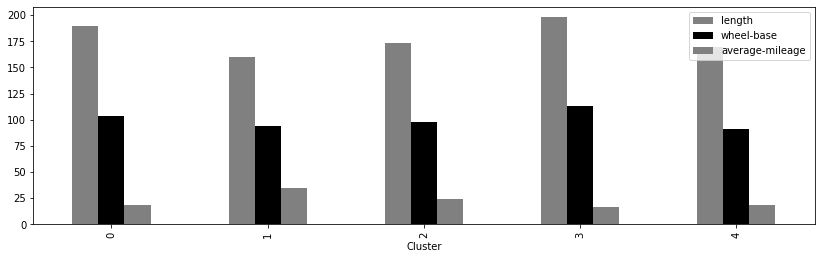

In [216]:
data0['Cluster'] = data_scaled.Cluster
plt.rcParams["figure.figsize"] = (14,4)

# Experiment 1
#data0.groupby('Cluster')[['price', 'horsepower','num-of-cylinders']].mean()\
# Experiment 2
#data0.groupby('Cluster')[['length','wheel-base']].mean()\
# Experiment 3
data0.groupby('Cluster')[['length','wheel-base', 'average-mileage']].mean()\
     .plot.bar(color=['gray','black'])

plt.show()